<a href="https://colab.research.google.com/github/JakeSparrow1/project_team_20/blob/main/shared_group_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. BUSINESS UNDERSTANDING

# problem statement
The University of Zambia wants to quickly identify research authored by its staff in the institutional repository. Manually verifying affiliations is slow and error-prone. We aim to build a predictive model that classifies whether an ETD document was authored by UNZA staff, based on metadata and content.

### Business Objectives

**What does "success" look like from a practical perspective?**

**Primary Success Indicators:**
- **Automated Classification**: System can process references faster than manual review
- **Research Visibility**: UNZA can quickly identify and showcase internal research citations  
- **Administrative Efficiency**: Reduce reference review time from days to hours
- **Decision Support**: Enable evidence-based faculty evaluation and research planning

**Practical Success Metrics:**
- **Time Savings**: 80% reduction in manual reference verification time
- **Processing Capability**: Handle 100-200 ETDs for comprehensive analysis
- **Accuracy**: >80% classification accuracy for administrative decision-making
- **User Adoption**: Research staff can operate system with minimal training
# Data Mining Goals
Primary goal: Build a supervised classification model
- We will build and evaluate a binaer classifier that inputs parsed reference metadata and outputs 1 if UNZA-STAFF author or 0 if NON UNZA_STAFF

# **Intial Project Success Criteria**  
- **Accuracy** : The model should achieve at least 80% accuracy and F1-score ≥ 0.80 on a held-out test dataset when classifying ETDs as authored by UNZA staff or not.
  
- **Efficiency** : The model should reduce manual affiliation verification time by at least 80% compared to the current process.  
- **Processing Capability** : The model should be able to process at least 50 ETDs per hour on available university hardware or cloud resources.




# 2. Data Understanding

In this section, we load our dataset, explore its structure, and generate initial insights.  
Each of the 5 group members contributes a different part of the data understanding process.


## 2.1 DATA LOADIND

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd


Mounted at /content/drive


In [ ]:
papers_path ='/content/drive/MyDrive/papers.csv'
papers_df = pd.read_csv(papers_path,sep=',')

##DATASET OVERVIEW

In [ ]:
papers_df.shape


(468, 11)

In [ ]:
papers_df.columns

Index(['Author', 'Title', 'University', 'Department', 'Location', 'Year',
       'Type', 'Publisher', 'Repository', 'Subjects', 'ReferenceCount'],
      dtype='object')

In [ ]:
papers_df.head()

,Author,Title,University,Department,Location,Year,Type,Publisher,Repository,Subjects,ReferenceCount
0,Joseph Mumba Zulu,Evaluating training programs for educational g...,University of Zambia,Department of Sociology,Zambia,2015,Article,Zambian Journal of Science,UNZA DSpace,Biology; Genetics; Molecular Biology,12
1,Peter Zulu,Analysis of economic development in urban sett...,UNZA,Department of Physics,"Lusaka, Zambia",2019,Article,Zambian Journal of Science,UNZA DSpace,Economics; Development; Policy Analysis,20
2,David Mwamba,Analysis of economic development in rural comm...,The University of Zambia,School of Business,Zambia,2023,Article,African Journal of Research,UNZA DSpace,Agriculture; Food Security; Sustainable Develo...,20
3,Joseph Mumba Zulu,Evaluating health interventions for poverty: A...,The University of Zambia,Department of Education,"Lusaka, Zambia",2021,Article,African Journal of Research,UNZA DSpace,Medicine; Clinical Research; Healthcare,16
4,Mary Zulu,The role of policy in learning: A systematic r...,UNZA,Department of Chemistry,Zambia,2012,Article,African Journal of Research,UNZA DSpace,Engineering; Technology; Innovation,13


In [ ]:
papers_df.iloc[170:175]

,Author,Title,University,Department,Location,Year,Type,Publisher,Repository,Subjects,ReferenceCount
170,Lisa Miller,The role of technology in learning: A systemat...,Yale University,Department of Chemistry,"Berkeley, CA, USA",2023,Article,International Journal of Research,Yale University Digital Repository,Education; Pedagogy; Learning,22
171,Michael Williams,Impact of socioeconomic status on student achi...,Oxford University,School of Business,"New York, NY, USA",2019,Article,International Journal of Research,Oxford University Digital Repository,Education; Pedagogy; Learning,28
172,Emily Jones,The role of technology in learning: A systemat...,Columbia University,Department of History,"Cambridge, UK",2021,Article,International Journal of Research,Columbia University Digital Repository,Education; Pedagogy; Learning,33
173,John Williams,The role of technology in healthcare delivery:...,University of Melbourne,Department of Mathematics,"Boston, MA, USA",2019,Article,International Journal of Research,University of Melbourne Digital Repository,Medicine; Clinical Research; Healthcare,22
174,John Johnson,Analysis of health outcomes in developing coun...,Imperial College London,Department of Chemistry,"Cambridge, MA, USA",2010,Article,International Journal of Research,Imperial College London Digital Repository,Computer Science; Artificial Intelligence; Mac...,26


##Data Quality Checks


In [ ]:
papers_df.describe()


,Year,ReferenceCount
count,468.000000,468.000000
mean,2016.606838,20.365385
std,5.838963,8.602141
min,1967.000000,0.000000
25%,2013.000000,15.000000
50%,2017.000000,21.000000
75%,2021.000000,25.250000
max,2025.000000,46.000000


In [ ]:
papers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Author          468 non-null    object
 1   Title           468 non-null    object
 2   University      465 non-null    object
 3   Department      411 non-null    object
 4   Location        468 non-null    object
 5   Year            468 non-null    int64 
 6   Type            468 non-null    object
 7   Publisher       468 non-null    object
 8   Repository      461 non-null    object
 9   Subjects        468 non-null    object
 10  ReferenceCount  468 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 40.3+ KB


In [ ]:
print(papers_df.isnull().sum())

Author             0
Title              0
University         3
Department        57
Location           0
Year               0
Type               0
Publisher          0
Repository         7
Subjects           0
ReferenceCount     0
dtype: int64


In [ ]:
print(papers_df.duplicated().sum())

0


In [ ]:
print(papers_df.nunique())

Author            237
Title             204
University         36
Department         24
Location           36
Year               25
Type                9
Publisher          46
Repository         74
Subjects           29
ReferenceCount     37
dtype: int64


In [ ]:
print(papers_df.dtypes)

Author            object
Title             object
University        object
Department        object
Location          object
Year               int64
Type              object
Publisher         object
Repository        object
Subjects          object
ReferenceCount     int64
dtype: object


# 2.3 DATA VISUALIZATION


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2.3.1 Bar chart for missing values

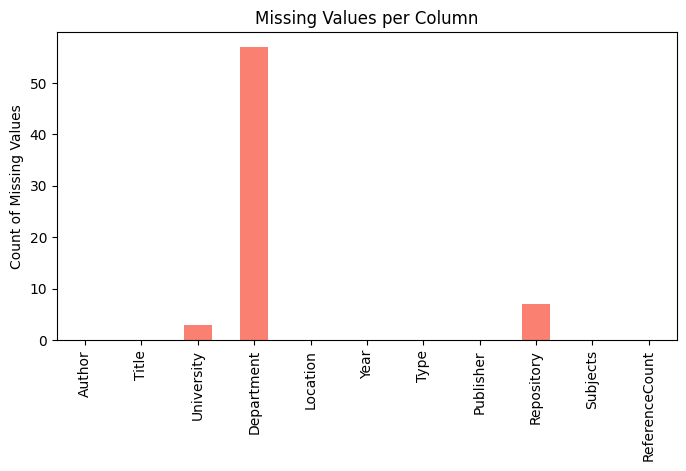

In [ ]:
plt.figure(figsize=(8,4))
papers_df.isnull().sum().plot(kind='bar', color='salmon')
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.show()

## 2.3.2 University distribution - Horizontal Bar

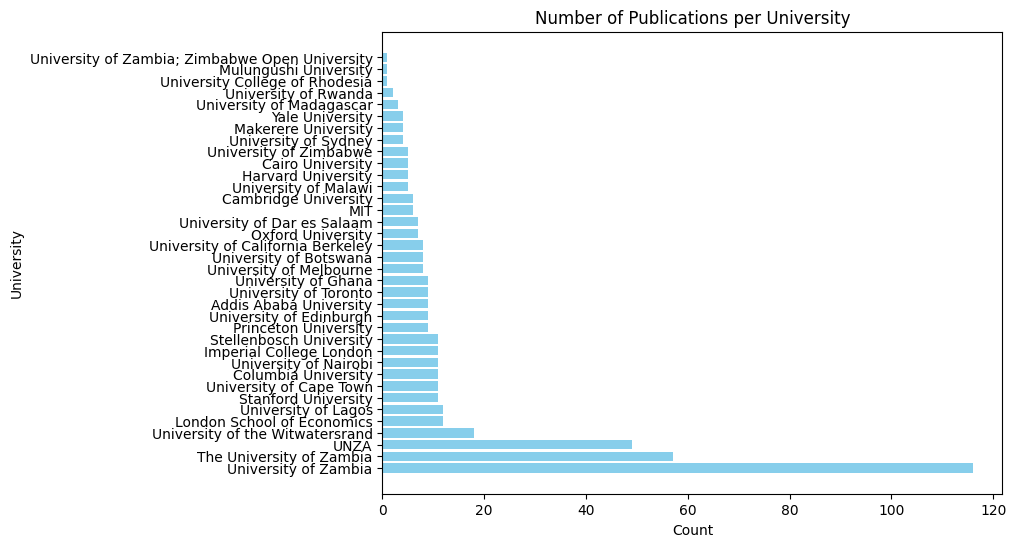

In [ ]:
uni_counts = papers_df['University'].value_counts()
plt.figure(figsize=(8,6))
plt.barh(uni_counts.index, uni_counts.values, color='skyblue')
plt.xlabel("Count")
plt.ylabel("University")
plt.title("Number of Publications per University")
plt.show()

## 2.3.3 Top 10 Authors by publications

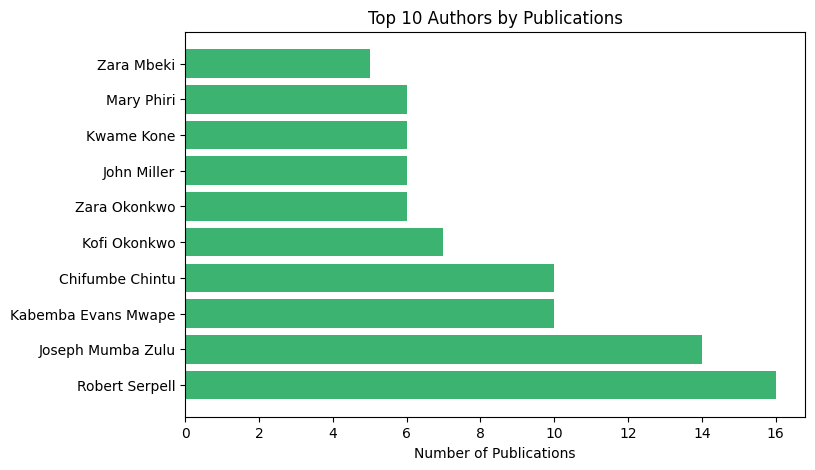

In [ ]:
top_authors = papers_df['Author'].value_counts().head(10)
plt.figure(figsize=(8,5))
plt.barh(top_authors.index, top_authors.values, color='mediumseagreen')
plt.xlabel("Number of Publications")
plt.title("Top 10 Authors by Publications")
plt.show()

## 2.3.4 Top 10 Repositories

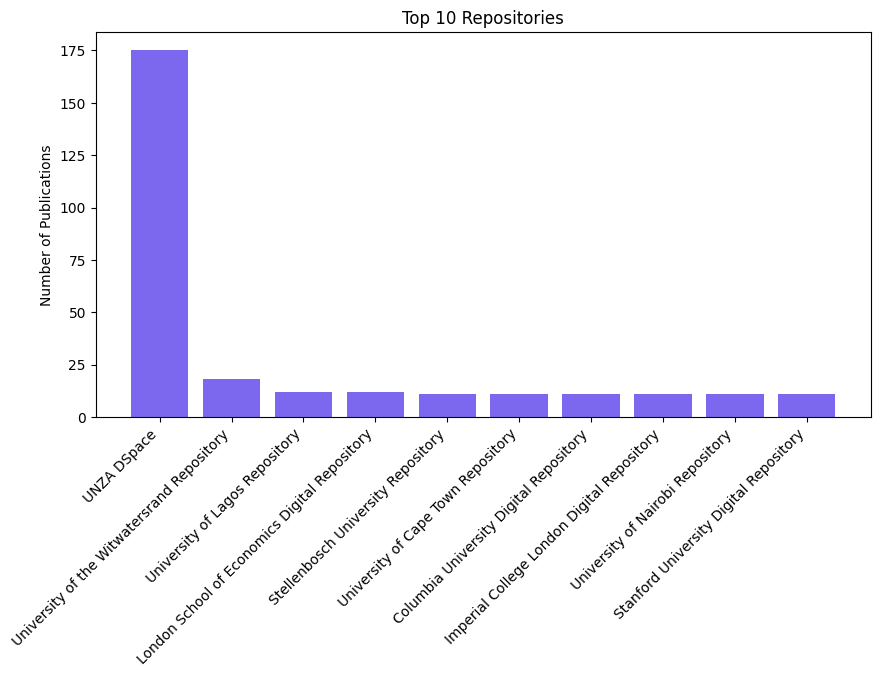

In [ ]:
repo_counts = papers_df['Repository'].value_counts().head(10)
plt.figure(figsize=(10,5))
plt.bar(repo_counts.index, repo_counts.values, color='mediumslateblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Publications")
plt.title("Top 10 Repositories")
plt.show()


## 2.3.5 Top 10 Subjects

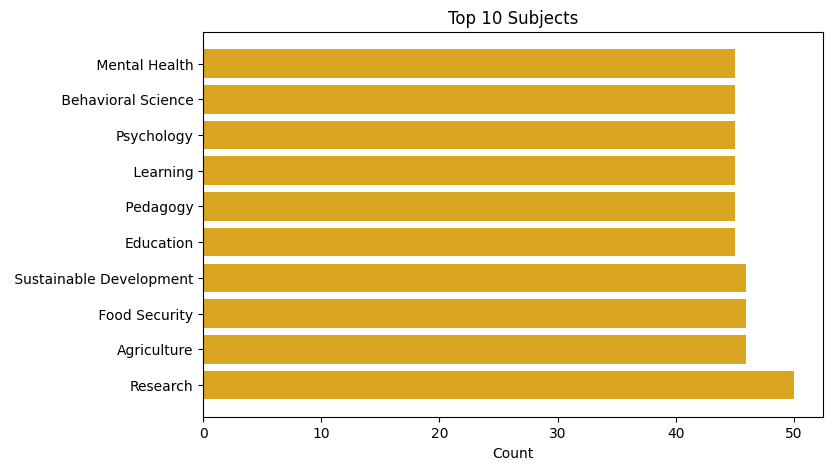

In [ ]:
from collections import Counter
# Split multi-subject entries
all_subjects = papers_df['Subjects'].str.split(';').sum()
subject_counts = Counter(all_subjects)
top_subjects = dict(subject_counts.most_common(10))

# Horizontal bar with Matplotlib
plt.figure(figsize=(8,5))
plt.barh(list(top_subjects.keys()), list(top_subjects.values()), color='goldenrod')
plt.xlabel("Count")
plt.title("Top 10 Subjects")
plt.show()

## 2.3.6 Number of Publications per Year

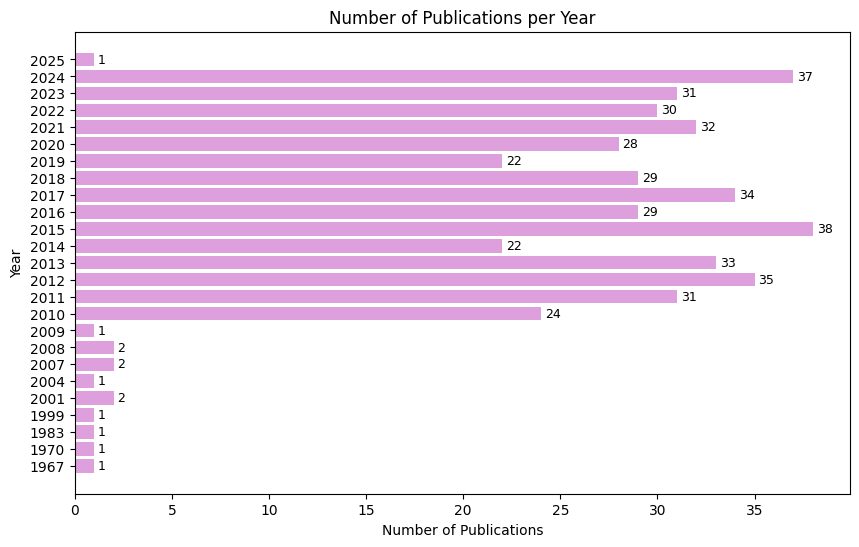

In [ ]:
year_counts = papers_df['Year'].value_counts().sort_index()

# Horizontal bar plot with numbers
plt.figure(figsize=(10,6))
plt.barh(year_counts.index.astype(str), year_counts.values, color='plum')
plt.xlabel("Number of Publications")
plt.ylabel("Year")
plt.title("Number of Publications per Year")

# Add numbers on bars
for i, v in enumerate(year_counts.values):
    plt.text(v + 0.2, i, str(v), va='center', fontsize=9)

plt.show()

# 2.4.7 Initial Data Exploration Summary

## Dataset Overview
The dataset contains 468 records and 11 columns: `Author`, `Title`, `University`, `Department`, `Location`, `Year`, `Type`, `Publisher`, `Repository`, `Subjects`, `ReferenceCount`.

Most columns are complete, but there are missing values in:

- `Department` (57 missing)  
- `University` (3 missing)  
- `Repository` (7 missing)  

## Unique Value Insights
- **Author**: 237 unique authors  
- **Title**: 204 unique publications  
- **University**: 36 variations → indicates inconsistent naming (e.g., `UNZA` vs `University of Zambia`)  
- **Department**: 24 unique values → some missing entries need cleaning  
- **Subjects**: 29 unique subjects  
- **ReferenceCount**: 37 unique values  

## Distribution Observations
- Most publications are concentrated in a few departments and universities.  
- `Year` ranges from 2012–2023, with publications relatively evenly spread but peaks in some years.  
- `ReferenceCount` distribution shows some high-reference outliers.  
- Some authors have multiple publications, with a few contributing significantly more than others.  

## Categorical Observations
- `Type` of publications is mostly **Articles**, with a few other types.  
- `Repository` is diverse, with **UNZA DSpace** being the dominant repository.  
- Subjects often overlap; many publications cover multiple fields (e.g., Biology & Genetics).  

## Data Quality Notes
- Inconsistent university naming may affect analysis.  
- Missing departments may reduce the accuracy of department-based analysis.  
- No missing values in key numeric fields (`Year`, `ReferenceCount`).  

## Next Steps
- **Data Cleaning**: Standardize university and department names, handle missing values.  
- **Feature Engineering**: Extract decade from `Year`, count subject categories per publication.  
- **Visualization & Modeling**: Explore author productivity, subject trends, and departmental contributions; prepare for clustering/classification models.


# 3.1 DATA PREPARATION

## 3.1.1 HANDLING MISSING VALUES

In [ ]:
print(papers_df.isna().sum())

Author             0
Title              0
University         3
Department        57
Location           0
Year               0
Type               0
Publisher          0
Repository         7
Subjects           0
ReferenceCount     0
dtype: int64


In [ ]:
papers_df.fillna('Unknown', inplace=True)

In [ ]:
print(papers_df.isna().sum())

Author             0
Title              0
University         3
Department        57
Location           0
Year               0
Type               0
Publisher          0
Repository         7
Subjects           0
ReferenceCount     0
dtype: int64


In [ ]:
print(papers_df['Department'].unique())

['Department of Sociology' 'Department of Physics' 'School of Business'
 'Department of Education' 'Department of Chemistry'
 'Department of History' 'Department of Public Health'
 'Department of Medicine' 'Department of Psychology'
 'Department of Mathematics' 'Department of Agriculture'
 'School of Engineering' 'Department of Computer Science'
 'Department of Biology' 'Department of Economics'
 'School of Medicine, Department of Community Medicine'
 'Department of Surgery' 'School of Medicine, Medical Library'
 'School of Medicine'
 'School of Medicine, Departments of Pathology & Microbiology, Biomedical Sciences'
 nan
 'Department of Chemistry, School of Natural Sciences; Department of Biological Sciences, University of Zambia; Department of Physiological Sciences, School of Medicine'
 'Department of Library and Information Science'
 'Main Library; School of Humanities & Social Sciences, Dept. of Sociology; School of Education, Dept. of Library & Information Science'
 'Institute of 

In [ ]:
print(papers_df['Repository'].unique())

['UNZA DSpace' 'University of Malawi Repository'
 'Cairo University Repository'
 'University of the Witwatersrand Repository'
 'Makerere University Repository' 'Stellenbosch University Repository'
 'University of Cape Town Repository'
 'University of Dar es Salaam Repository'
 'University of Botswana Repository' 'University of Lagos Repository'
 'Addis Ababa University Repository' 'University of Madagascar Repository'
 'University of Ghana Repository' 'University of Nairobi Repository'
 'University of Zimbabwe Repository'
 'University of Edinburgh Digital Repository'
 'Columbia University Digital Repository'
 'University of California Berkeley Digital Repository'
 'Princeton University Digital Repository'
 'London School of Economics Digital Repository'
 'Imperial College London Digital Repository'
 'Oxford University Digital Repository'
 'Stanford University Digital Repository'
 'University of Sydney Digital Repository'
 'University of Toronto Digital Repository'
 'Cambridge Universit

In [ ]:
print(papers_df['Author'].unique())

['Joseph Mumba Zulu' 'Peter Zulu' 'David Mwamba' 'Mary Zulu' 'Mary Phiri'
 'Grace Zulu' 'Mary Banda' 'Kabemba Evans Mwape' 'Susan Tembo'
 'David Banda' 'Grace Sakala' 'Ruth Sakala' 'David Phiri' 'Mary Mwamba'
 'Grace Chanda' 'Robert Serpell' 'James Mulenga'
 'Erastus Mishengu Mwanaumo' 'James Chanda' 'David Zulu' 'Susan Phiri'
 'Grace Mulenga' 'Ruth Tembo' 'Grace Phiri' 'Peter Sakala' 'John Tembo'
 'Mary Tembo' 'Susan Mwamba' 'Peter Tembo' 'Susan Chanda' 'Mary Sakala'
 'Susan Zulu' 'Chifumbe Chintu' 'Peter Mulenga' 'James Tembo'
 'John Mulenga' 'John Chanda' 'John Phiri' 'Grace Tembo' 'David Sakala'
 'Kwame Mensah' 'Emeka Abdullahi' 'Amina Abdullahi' 'Fatima Kone'
 'Zara Okonkwo' 'Amina Hassan' 'Kwame Mbeki' 'Emeka Mbeki' 'Fatima Hassan'
 'Emeka Diallo' 'Aisha Mutua' 'Obiora Okonkwo' 'Kofi Okonkwo'
 'Kofi Mensah' 'Kofi Abdullahi' 'Emeka Hassan' 'Fatima Abdullahi'
 'Amina Mbeki' 'Zara Mutua' 'Kwame Kone' 'Obiora Mensah' 'Obiora Diallo'
 'Zara Abdullahi' 'Zara Mbeki' 'Emeka Mutua' 'Amina

In [ ]:
print(papers_df['Location'].unique())

['Zambia' 'Lusaka, Zambia' 'Antananarivo, Madagascar' 'Harare, Zimbabwe'
 'Kampala, Uganda' 'Lilongwe, Malawi' 'Addis Ababa, Ethiopia'
 'Cape Town, South Africa' 'Accra, Ghana' 'Nairobi, Kenya'
 'Gaborone, Botswana' 'Kigali, Rwanda' 'Dar es Salaam, Tanzania'
 'Cairo, Egypt' 'Johannesburg, South Africa' 'Lagos, Nigeria'
 'Boston, MA, USA' 'Oxford, UK' 'Stanford, CA, USA' 'Cambridge, UK'
 'New York, NY, USA' 'Edinburgh, UK' 'Melbourne, Australia'
 'Cambridge, MA, USA' 'London, UK' 'Berkeley, CA, USA' 'Sydney, Australia'
 'Princeton, NJ, USA' 'New Haven, CT, USA' 'Salisbury, Rhodesia'
 'General Hospital, Ndola; Central Hospital, Kitwe, Zambia'
 'Zambia (health sector context, Ministry of Health referenced)'
 'University of Zambia Medical Library / Zambia health sector context'
 'Mpongwe District, Zambia' 'Zomba District, Malawi' 'Toronto, Canada']


In [ ]:
print(papers_df['Publisher'].unique())

['Zambian Journal of Science' 'African Journal of Research'
 'Medical Journal of Zambia' 'University Journal of Research'
 'Cairo Journal of Research' 'Makerere Journal of Research'
 'Stellenbosch Journal of Research' 'Addis Journal of Research'
 'International Journal of Research'
 'University of Zambia Medical Library' 'The University of Zambia'
 'British Journal of Medicine & Medical Research'
 'IEEE International Conference in Information and Communication Technologies'
 'Zambia Journal of Library & Information Science'
 'International Journal of Metadata, Semantics and Ontologies (IJMSO)'
 'American Journal of Educational Research'
 'The International Journal of Multi-Disciplinary Research'
 'Sciencedomain International' 'OMICS Publishing Group' 'Elsevier BV'
 'Inderscience Publishers' 'Qeios Ltd' 'Academic Journals'
 'Informa UK Limited' 'Magnolia Press' 'InTech' 'Mark Allen Group'
 'Scientific Research Publishing, Inc.' 'Cambridge University Press'
 'SASPR Edu International Pvt.

In [ ]:
print(papers_df['Subjects'].unique())

['Biology; Genetics; Molecular Biology'
 'Economics; Development; Policy Analysis'
 'Agriculture; Food Security; Sustainable Development'
 'Medicine; Clinical Research; Healthcare'
 'Engineering; Technology; Innovation'
 'Public Health; Epidemiology; Health Policy'
 'Environmental Science; Climate Change; Sustainability'
 'Education; Pedagogy; Learning'
 'Psychology; Behavioral Science; Mental Health'
 'Computer Science; Artificial Intelligence; Machine Learning'
 'Zambia; Personnel Staffing and Scheduling--Zambia; Health Personnel--Zambia; Rural Health--Zambia'
 'Brain Vascular Disorders--Zambia; Intracranial Vascular Disorders--Zambia; Cerebrovascular Disorders--Zambia'
 'HIV/AIDS' 'Tibia; Diaphyses; Bone and Bones'
 'Calcitonin; C-Reactive Protein; Hematologic Neoplasms; Bacteremia; Biomarkers'
 'Hemosiderosis; Siderosis; Osteoporosis; Scurvy'
 'Health Resources; Health Crisis'
 'Cervical Cancer in Africa; HIV and AIDS in schools; Polio Virus'
 'Schistosomiasis--Prevalence; Schistos

In [ ]:
print(papers_df['Title'].unique())

['Evaluating training programs for educational gaps: A randomized controlled trial'
 'Analysis of economic development in urban settings: A quantitative approach'
 'Analysis of economic development in rural communities: A qualitative approach'
 'Evaluating health interventions for poverty: A randomized controlled trial'
 'The role of policy in learning: A systematic review'
 'Analysis of environmental factors in urban settings: A longitudinal approach'
 'Understanding environmental factors: Implications for healthcare'
 'Analysis of environmental factors in urban settings: A qualitative approach'
 'Evaluating policy changes for educational gaps: A randomized controlled trial'
 'longitudinal assessment of economic development among healthcare workers'
 'The role of policy in healthcare delivery: A systematic review'
 'Evaluating health interventions for malaria: A randomized controlled trial'
 'Factors influencing technology adoption in Sub-Saharan Africa: A cross-sectional study'
 'Und

## DATA STANDARDIZATION IS ATTRIBUTES

##3.1.2 Inital text preprocessing functions

## 3.1.2.1 Defined functions clean_text and clean_department

In [89]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# ---------------------------
# 1. Text Cleaning Functions
# ---------------------------
import re
import pandas as pd
import numpy as np

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower().strip()
    text = re.sub(r"&amp;", "and", text)
    text = re.sub(f"[{re.escape('!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')}]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text)  # collapse multiple spaces
    return text
papers_df["Title_Cleaned"] = papers_df["Title"].apply(clean_text)
papers_df["Subjects_Cleaned"] = papers_df["Subjects"].apply(clean_text)


def clean_department(dept):
    if pd.isna(dept) or dept.strip().lower() == "unknown":
        return "other"
    dept = dept.lower().strip()
    dept = re.sub(r"\bdept\.\b", "department", dept)
    dept = re.sub(r"\bdept\b", "department", dept)
    dept = re.sub(f"[{re.escape('!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')}]", "", dept)
    dept = re.sub(r"\s+", " ", dept)
    return dept
papers_df["Department"] = papers_df["Department"].apply(clean_department)

In [90]:
print(papers_df['Department'].unique())

['department of sociology' 'department of physics' 'school of business'
 'department of education' 'department of chemistry'
 'department of history' 'department of public health'
 'department of medicine' 'department of psychology'
 'department of mathematics' 'department of agriculture'
 'school of engineering' 'department of computer science'
 'department of biology' 'department of economics'
 'school of medicine department of community medicine'
 'department of surgery' 'school of medicine medical library'
 'school of medicine'
 'school of medicine departments of pathology microbiology biomedical sciences'
 'other'
 'department of chemistry school of natural sciences department of biological sciences university of zambia department of physiological sciences school of medicine'
 'department of library and information science'
 'main library school of humanities social sciences department of sociology school of education department of library information science'
 'institute of dista

## 3.1.2.2 Defined functions of clean_repository and clean_location

In [91]:
def clean_repository(repo):
    if pd.isna(repo) or repo.strip().lower() == "unknown":
        return "other"
    repo = repo.lower().strip()
    repo = repo.replace("&amp;", "and")
    if "dspace.unza.zm" in repo or "unza dspace" in repo:
        return "university of zambia digital repository"
    elif repo.startswith("http"):
        return "url_repository"
    elif "repository" in repo or "dspace" in repo:
        return "institutional_repository"
    elif "journal" in repo or "review" in repo or "studies" in repo:
        return "journal"
    else:
        return repo

def clean_location(loc):
    if pd.isna(loc) or loc.strip().lower() == "unknown":
        return "other"
    loc = loc.lower().strip()
    loc = re.sub(r"\(.*?\)", "", loc)  # remove parentheses
    loc = re.split(r"[;/]", loc)[-1]   # take last part if multiple locations
    loc = loc.strip()
    loc = re.sub(r",.*", "", loc)      # keep only country
    return loc
papers_df["Location_Cleaned"] = papers_df["Location"].apply(clean_location)
papers_df["Repository_Cleaned"] = papers_df["Repository"].apply(clean_repository)

In [92]:
print(papers_df['Location_Cleaned'].unique())


['zambia' 'lusaka' 'antananarivo' 'harare' 'kampala' 'lilongwe'
 'addis ababa' 'cape town' 'accra' 'nairobi' 'gaborone' 'kigali'
 'dar es salaam' 'cairo' 'johannesburg' 'lagos' 'boston' 'oxford'
 'stanford' 'cambridge' 'new york' 'edinburgh' 'melbourne' 'london'
 'berkeley' 'sydney' 'princeton' 'new haven' 'salisbury'
 'central hospital' 'zambia health sector context' 'mpongwe district'
 'zomba district' 'toronto']


In [93]:
print(papers_df['Repository_Cleaned'].unique())

['university of zambia digital repository' 'institutional_repository'
 'journal' 'other' 'zootaxa' 'food and waterborne parasitology'
 'current topics in giardiasis' 'obstetric and intrapartum emergencies'
 'bmc health services research' 'sustainable agriculture research'
 'onderstepoort j vet res' 'advances in applied sociology'
 'aea randomized controlled trials' "bmc women's health"
 'environment and pollution' 'nursing philosophy'
 'energy and environment research' 'the lancet']


##3.1.2.3 DEFINE FUNCTIONS CLEAN_AUTHOR AND STANDARDIZE_UNIVERSITY

In [94]:

def clean_author(author):
    author = author.lower().strip()
    author = re.sub(r"[.,]", "", author)
    author = re.sub(r"\s+", " ", author)
    return author

import re
import pandas as pd
import numpy as np

def standardize_university(name):
    if pd.isna(name):
        return "others"

    # 1. Lowercase + strip
    name = name.strip().lower()
    # 2. Remove punctuation
    name = re.sub(r"[^\w\s]", " ", name)
    # 3. Normalize spaces
    name = re.sub(r"\s+", " ", name).strip()
    # 4. Mapping rules (substring-based)
    if "zambia" in name or "unza" in name:
        return "University of Zambia"
    if "mulungushi" in name:
        return "Mulungushi University"
    # 5. Fallback: Title case
    return name.title()

papers_df["University_Cleaned"] = papers_df["University"].apply(standardize_university)


In [95]:
print(papers_df['University_Cleaned'].unique())

['University of Zambia' 'University Of Malawi' 'Cairo University'
 'University Of The Witwatersrand' 'Makerere University'
 'Stellenbosch University' 'University Of Cape Town'
 'University Of Dar Es Salaam' 'University Of Botswana'
 'University Of Lagos' 'Addis Ababa University' 'University Of Madagascar'
 'University Of Ghana' 'University Of Nairobi' 'University Of Zimbabwe'
 'University Of Edinburgh' 'Columbia University'
 'University Of California Berkeley' 'Princeton University'
 'London School Of Economics' 'Imperial College London'
 'Oxford University' 'Stanford University' 'University Of Sydney'
 'University Of Toronto' 'Cambridge University' 'University Of Melbourne'
 'Harvard University' 'Mit' 'Yale University'
 'University College Of Rhodesia' 'others' 'Mulungushi University'
 'University Of Rwanda']


## 3.1.2.3 FEATURE EXTRACTION

In [97]:
# Split multiple authors into a list and clean them
papers_df["Author_List"] = papers_df["Author"].str.split(";").apply(lambda lst: [clean_author(a) for a in lst])

# ---------------------------
# 3. Create Target Variable
# ---------------------------

# Example UNZA staff list
unza_staff = [
    "joseph mumba zulu", "peter zulu", "mary zulu", "david mwamba",
    "mary phiri", "grace zulu", "mary banda", "kabemba evans mwape",
    "jackson phiri", "phiri lighton", "mayumbo nyerenda",
    "susan tembo", "david banda", "grace sakala", "ruth sakala",
    "david phiri", "mary mwamba", "grace chanda", "james mulenga",
    "james chanda", "david zulu", "susan phiri", "grace mulenga",
    "ruth tembo", "grace phiri", "peter sakala", "john tembo",
    "mary tembo", "susan mwamba", "peter tembo", "susan chanda",
    "mary sakala", "susan zulu", "chifumbe chintu", "peter mulenga",
    "james tembo", "john mulenga", "john chanda", "john phiri",
    "grace tembo", "david sakala"
]

# Recompute is_UNZA based on multiple conditions
def is_unza_row(row):
    # Author match
    author_match = any(a in unza_staff for a in row["Author_List"])

    # University, Repository, Publisher checks
    university_match = row.get("University_Cleaned") == "University of Zambia"
    repository_match = row.get("Repository_Cleaned") == "University of Zambia Digital Library"
    publisher_match = row.get("Publisher") == "Medical Journal"

    return int(author_match or university_match or repository_match or publisher_match)

# Apply row-wise
papers_df["is_UNZA_author"] = papers_df.apply(is_unza_row, axis=1)

# Define y
y = papers_df["is_UNZA_author"]

# ---------------------------
# 4. Encode Categorical Features
# ---------------------------

categorical_cols = ["University", "Department", "Location_Cleaned", "Type", "Publisher", "Repository_Cleaned"]
X_categorical = pd.get_dummies(papers_df[categorical_cols], drop_first=True)

# ---------------------------
# 5. Vectorize Text Features
# ---------------------------

tfidf_title = TfidfVectorizer(stop_words='english', max_features=500)
X_title = tfidf_title.fit_transform(papers_df["Title_Cleaned"])

tfidf_subjects = TfidfVectorizer(stop_words='english', max_features=300)
X_subjects = tfidf_subjects.fit_transform(papers_df["Subjects_Cleaned"])

# ---------------------------
# 6. Numeric Features
# ---------------------------

X_numeric = papers_df[["Year", "ReferenceCount"]].values
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# ---------------------------
# 7. Combine All Features
# ---------------------------

X = hstack([X_title, X_subjects, X_categorical.values, X_numeric_scaled])

print("Feature matrix shape:", X.shape)
print("Target variable distribution:\n", y.value_counts())

Feature matrix shape: (468, 795)
Target variable distribution:
 is_UNZA_author
0    245
1    223
Name: count, dtype: int64


# 4 MODELING

## 4.1 RANDOM FOREST

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    accuracy_score,
    roc_auc_score,
    roc_curve
)

# =====================================================
#  Train-Test Split
# =====================================================

# 1. X Combined features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. X_numeric features
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42, stratify=y
)
# 3. Encode Categorical Features (X_categorical)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_categorical, y, test_size=0.2, random_state=42, stratify=y
)

# 4.1 Vectorize Text Features (X_title)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    X_title, y, test_size=0.2, random_state=42, stratify=y
)

# 4.2 Vectorize Text Features (X_subjects)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(
    X_subjects, y, test_size=0.2, random_state=42, stratify=y
)


# Dictionary to store results
results = {}



In [99]:
# =====================================================
# 2. Random Forest on X_numeric features
# =====================================================
rf = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42
)
rf.fit(X_train_2, y_train)
y_pred_rf = rf.predict(X_test_2)
y_prob_rf = rf.predict_proba(X_test_2)[:, 1]

results["Random Forest X_numeric"] = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "F1-score": f1_score(y_test, y_pred_rf),
    "AUC": roc_auc_score(y_test, y_prob_rf),
    "Report": classification_report(y_test, y_pred_rf),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_rf),
    "ROC": roc_curve(y_test, y_prob_rf)
}

## 4.2 LOGISTIC REGRESSION


In [100]:
# =====================================================
# 3.1 Logistic Regression on Encode Categorical Features (X_categorical)
# =====================================================
lr = LogisticRegression(
    max_iter=1000, class_weight='balanced', random_state=42
)
lr.fit(X_train_3, y_train_3)
y_pred_lr = lr.predict(X_test_3)
y_prob_lr = lr.predict_proba(X_test_3)[:, 1]

results["Logistic Regression X_categorical"] = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "F1-score": f1_score(y_test, y_pred_lr),
    "AUC": roc_auc_score(y_test, y_prob_lr),
    "Report": classification_report(y_test, y_pred_lr),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_lr),
    "ROC": roc_curve(y_test, y_prob_lr)
}



In [101]:
# =====================================================
# 3 Logistic Regression Vectorize Text Features (X_subjects)
# =====================================================
lr = LogisticRegression(
    max_iter=1000, class_weight='balanced', random_state=42
)
lr.fit(X_train_5, y_train_5)
y_pred_lr = lr.predict(X_test_5)
y_prob_lr = lr.predict_proba(X_test_5)[:, 1]

results["Logistic Regression X_subjects"] = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "F1-score": f1_score(y_test, y_pred_lr),
    "AUC": roc_auc_score(y_test, y_prob_lr),
    "Report": classification_report(y_test, y_pred_lr),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_lr),
    "ROC": roc_curve(y_test, y_prob_lr)
}

## 4.3 DECISION TREE

In [102]:

# =====================================================
# 3. Decision Tree X combined
# =====================================================
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

results["Decision Tree X_combined"] = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "F1-score": f1_score(y_test, y_pred_dt),
    "AUC": roc_auc_score(y_test, y_prob_dt),
    "Report": classification_report(y_test, y_pred_dt),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_dt),
    "ROC": roc_curve(y_test, y_prob_dt)
}

## 4.4 Gradient Boosting

In [103]:
# =====================================================
# 4.1 Vectorize Text Features (X_title)
# =====================================================

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_4, y_train)
y_pred_gb = gb.predict(X_test_4)
y_prob_gb = gb.predict_proba(X_test_4)[:, 1]

results["Gradient Boosting X_title"] = {
    "Accuracy": accuracy_score(y_test, y_pred_gb),
    "F1-score": f1_score(y_test, y_pred_gb),
    "AUC": roc_auc_score(y_test, y_prob_gb),
    "Report": classification_report(y_test, y_pred_gb),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_gb),
    "ROC": roc_curve(y_test, y_prob_gb)
}

# 5 DATA EVALUATION

In [104]:
# =====================================================
# 5. Evaluation & Comparison
# =====================================================
print("\n========== MODEL COMPARISON ==========")
comparison = []
for model, metrics in results.items():
    print(f"\n===== {model} =====")
    print("Accuracy:", metrics["Accuracy"])
    print("F1-score:", metrics["F1-score"])
    print("AUC:", metrics["AUC"])
    print("Classification Report:\n", metrics["Report"])
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])

    comparison.append([model, metrics["Accuracy"], metrics["F1-score"], metrics["AUC"]])




========== MODEL COMPARISON ==========

===== Random Forest X_numeric =====
Accuracy: 0.7127659574468085
F1-score: 0.6823529411764706
AUC: 0.864172335600907
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74        49
           1       0.72      0.64      0.68        45

    accuracy                           0.71        94
   macro avg       0.71      0.71      0.71        94
weighted avg       0.71      0.71      0.71        94

Confusion Matrix:
 [[38 11]
 [16 29]]

===== Logistic Regression X_categorical =====
Accuracy: 0.9893617021276596
F1-score: 0.989010989010989
AUC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      1.00      0.99        45

    accuracy                           0.99        94
   macro avg       0.99      0.99      0.99        94
weighted avg       0.99      0.99      0.99 

In [105]:
# Summary table
df_results = pd.DataFrame(comparison, columns=["Model", "Accuracy", "F1-score", "AUC"])
print("\n\n===== SUMMARY TABLE =====")
print(df_results)




===== SUMMARY TABLE =====
                               Model  Accuracy  F1-score       AUC
0            Random Forest X_numeric  0.712766  0.682353  0.864172
1  Logistic Regression X_categorical  0.989362  0.989011  1.000000
2     Logistic Regression X_subjects  0.638298  0.500000  0.664853
3           Decision Tree X_combined  0.989362  0.989011  0.989796
4          Gradient Boosting X_title  0.542553  0.547368  0.640363


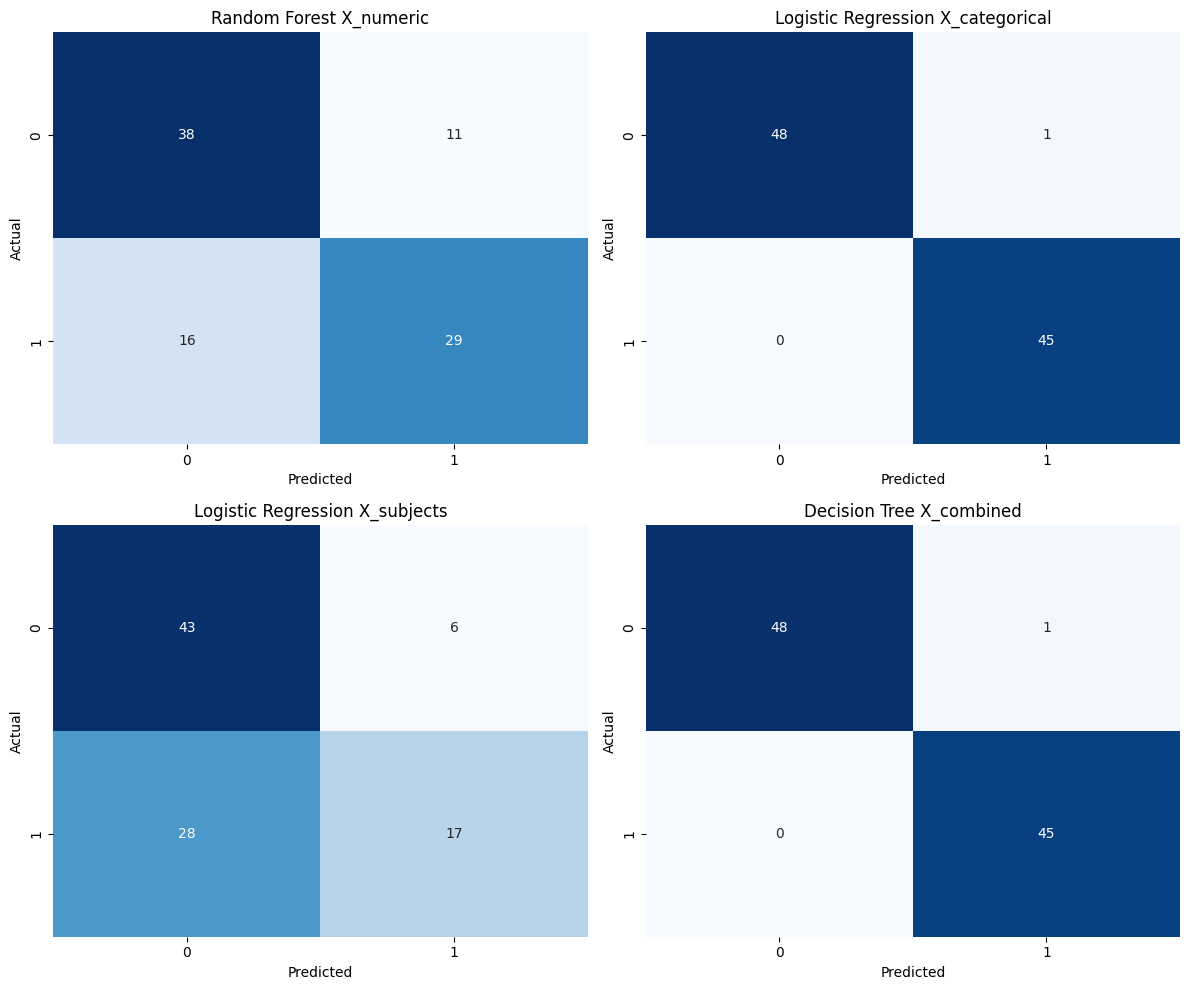

In [106]:
# ---- Plot Confusion Matrices ----
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (model, metrics) in zip(axes, results.items()):
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False)
    ax.set_title(f"{model}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()



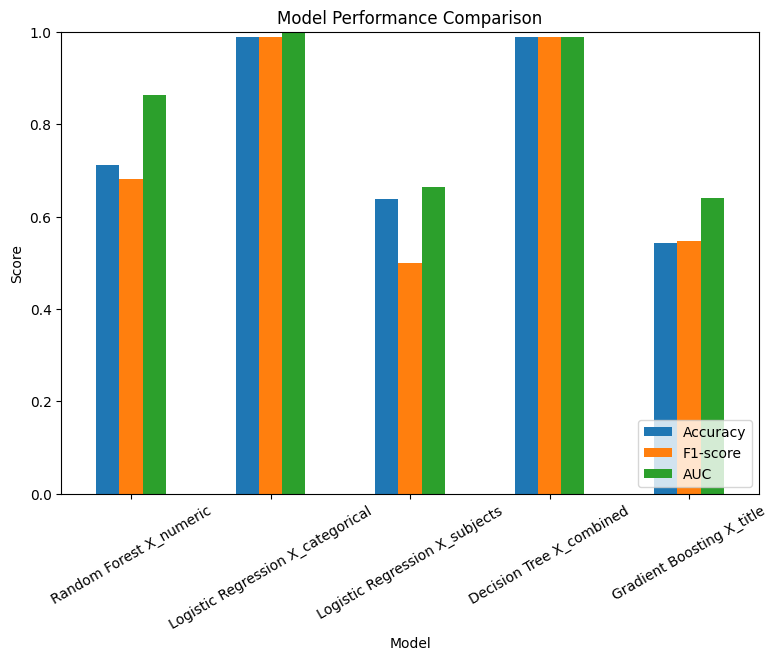

In [107]:
# ---- Plot Accuracy, F1, AUC Comparison ----
df_results.set_index("Model")[["Accuracy", "F1-score", "AUC"]].plot(kind="bar", figsize=(9,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.legend(loc="lower right")
plt.show()


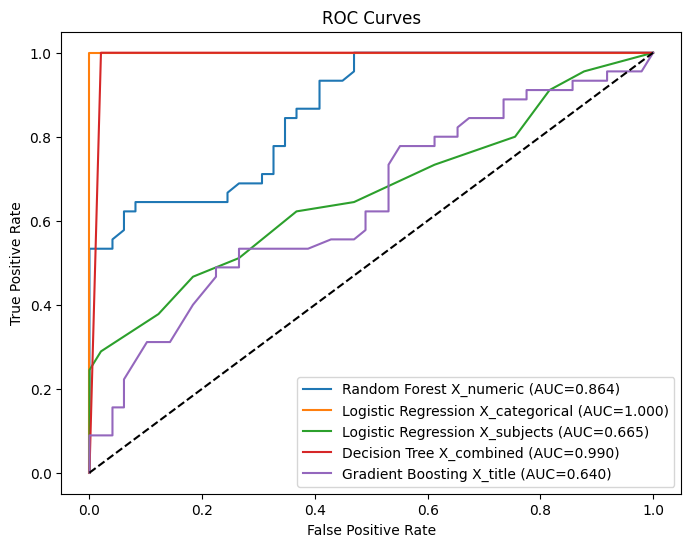

In [108]:
# ---- Plot ROC Curves ----
plt.figure(figsize=(8,6))
for model, metrics in results.items():
    fpr, tpr, _ = metrics["ROC"]
    plt.plot(fpr, tpr, label=f"{model} (AUC={metrics['AUC']:.3f})")

plt.plot([0,1], [0,1], "k--")  # diagonal baseline
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# 6. DEPLOYMENT